# APA Laboratori 2 - Visualitzacio

In [1]:
# Uncomment to install packages if missing
# install.packages('rgl')

In [2]:
options(repr.plot.width=6, repr.plot.height=6)

In [3]:
set.seed(222)
library(MASS)

## Example 1: Comparison between PCA and LDA on 2D toy data

 Fisher's discriminant analysis (FDA) is a method that finds a linear combination of features to project or separate two or more classes of objects

If your goal is to perform (linear) dimensionality reduction for class discrimination, you should use FDA instead of PCA; PCA is useful for signal representation (but not necessarily for discrimination)

 Sigma is a 2x2 positive-definite symmetric matrix specifying the covariance matrix of two variables

In [4]:
N <- 200

(Sigma <- matrix(data=c(2,1.3,1.3,1),nrow=2,ncol=2,byrow=TRUE))

2.0,1.3
1.3,1.0


 these are the eigenvalues:

In [5]:
eigen (Sigma, only.values=TRUE)$values

[1] 2.8928388 0.1071612


Let's create class 1 ('red' class)

In [6]:
mean.1 <- matrix(c(2,0),nrow=2,ncol=1)                         

X.red <- mvrnorm(N,mu=mean.1,Sigma=Sigma)

 Let's create class 2 ('green' class)

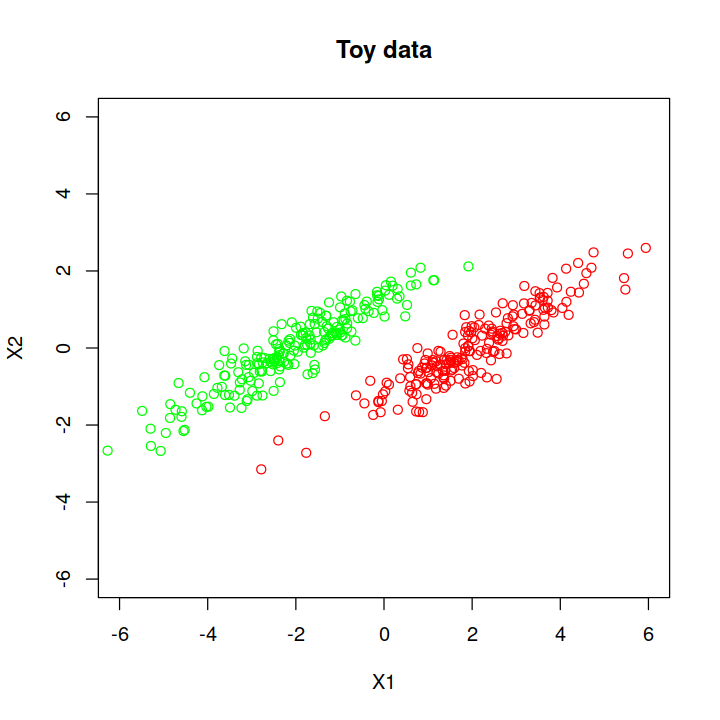

In [7]:
mean.2 <- -mean.1

X.green <- mvrnorm(N,mu=mean.2,Sigma=Sigma)

options(repr.plot.width=6, repr.plot.height=6)
par(mfrow=c(1,1))

plot(c(X.red[,1],X.green[,1]), c(X.red[,2],X.green[,2]), 
     col=c(rep('red',N),rep('green',N)), main="Toy data", 
     xlab="X1", ylab="X2", xlim=c(-6,6),ylim=c(-6,6))

 Now we glue both classes one after the other and create a dataframe

In [8]:
d <- data.frame(c(rep(1,N),rep(2,N)), 
                c(X.red[,1], X.green[,1]), 
                c(X.red[,2], X.green[,2]))
colnames(d) <- c("target", "X1", "X2")
d$target <- as.factor(d$target)
summary(d)

 target        X1                 X2           
 1:200   Min.   :-6.27110   Min.   :-3.150119  
 2:200   1st Qu.:-2.03731   1st Qu.:-0.627813  
         Median : 0.08669   Median :-0.072780  
         Mean   :-0.01191   Mean   :-0.005264  
         3rd Qu.: 1.91122   3rd Qu.: 0.667361  
         Max.   : 5.94018   Max.   : 2.598271  

call to FDA (also known as LDA, because it is linear)

In [9]:
myLDA <- lda(d[c(2,3)],d[,1])
myLDA

Call:
lda(d[c(2, 3)], d[, 1])

Prior probabilities of groups:
  1   2 
0.5 0.5 

Group means:
         X1           X2
1  1.994097 -0.007532107
2 -2.017914 -0.002995413

Coefficients of linear discriminants:
         LD1
X1 -1.810296
X2  2.420905

 Now we show the best projection direction on the original space. This direction maximizes the separability of the classes. For that, we first need the slope:

In [10]:
LDAslope <- myLDA$scaling[2]/myLDA$scaling[1]
LDAslope

[1] -1.337298

 And now we can perform the visualization:

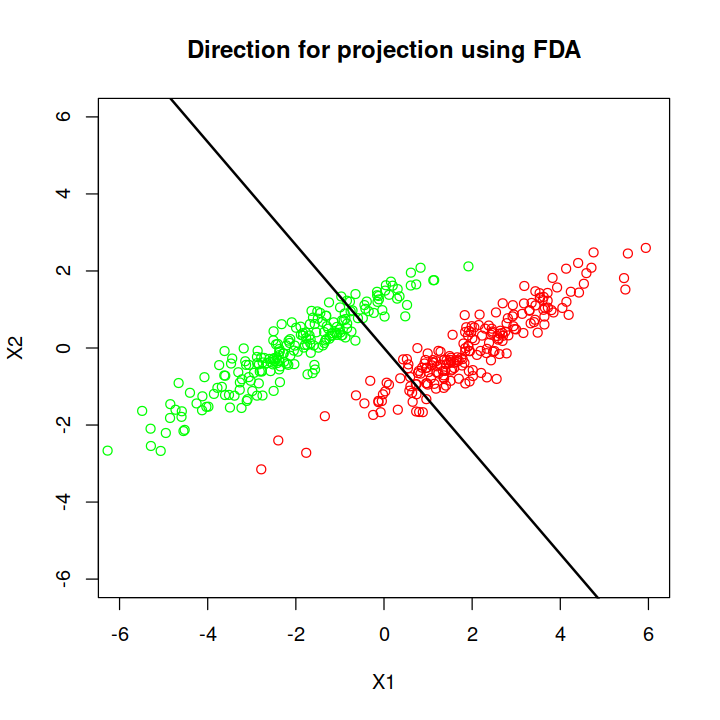

In [11]:
plot(c(X.red[,1],X.green[,1]), c(X.red[,2],X.green[,2]),
     col=c(rep('red',N),rep('green',N)),
     main="Direction for projection using FDA",
     xlab="X1", ylab="X2", xlim=c(-6,6),ylim=c(-6,6))

abline(0,LDAslope,col='black',lwd=2)

 We can also compute the projections of the two classes

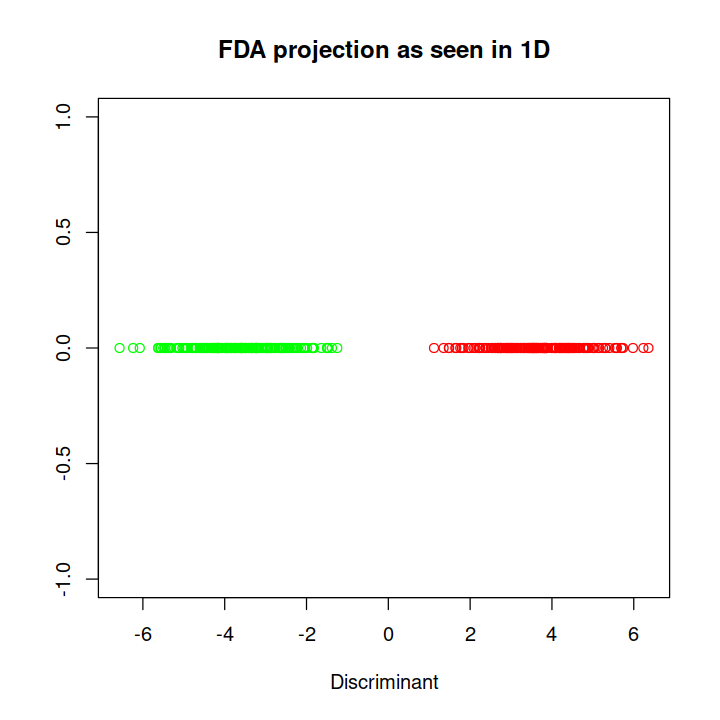

In [12]:
myLDA.proj <- d[,2] * myLDA$scaling[1] + d[,3] * myLDA$scaling[2]

plot(myLDA.proj, c(rep(0,N),rep(0,N)), col=c(rep('green',N),rep('red',N)),
     main='FDA projection as seen in 1D', xlab="Discriminant", ylab="")

 To understand what is going on, do:

In [13]:
myLDA

Call:
lda(d[c(2, 3)], d[, 1])

Prior probabilities of groups:
  1   2 
0.5 0.5 

Group means:
         X1           X2
1  1.994097 -0.007532107
2 -2.017914 -0.002995413

Coefficients of linear discriminants:
         LD1
X1 -1.810296
X2  2.420905

of which ...

In [14]:
myLDA$scaling

,LD1
X1,-1.810296
X2,2.420905


 ... are the coefficients of the linear discriminant

 So we are projecting the data into the direction that maximizes (linear) separability:

 `projection(X) = X1*myLDA$scaling[1] + X2*myLDA$scaling[2]`

---

 Now we compute PCA:

In [15]:
myPCA <- prcomp(d[c(2,3)],scale=TRUE)

 Now we need to project the data in the first principal component

In [16]:
d1PCA <- myPCA$x[,1]
PCAslope1 <- myPCA$rotation[2,1]/myPCA$rotation[1,1]
PCAslope2 <- myPCA$rotation[2,2]/myPCA$rotation[1,2]
PCAslope1
PCAslope2

[1] 1

[1] -1

 And now we can perform the visualization:

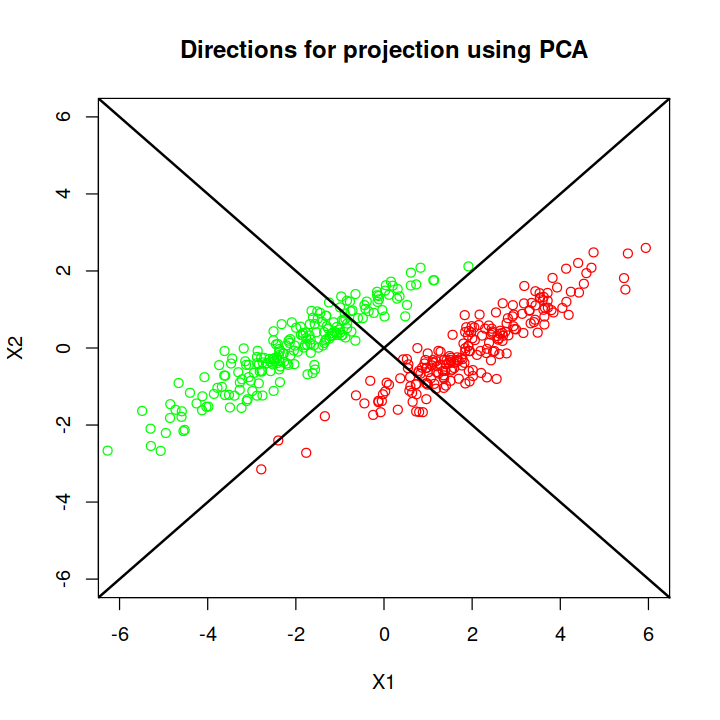

In [17]:
plot(c(X.red[,1],X.green[,1]), c(X.red[,2],X.green[,2]),
     col=c(rep('red',N),rep('green',N)),
     main="Directions for projection using PCA",
     xlab="X1", ylab="X2", xlim=c(-6,6),ylim=c(-6,6))

abline(0,PCAslope1,col='black',lwd=2)
abline(0,PCAslope2,col='black',lwd=2)

 We can see that the FDA projection maximices separability while the PCA projection maximices variability
 
 The rotation matrix allows to transform the data to an ortogonal space

In [18]:
myPCA$rotation

,PC1,PC2
X1,0.7071068,-0.7071068
X2,0.7071068,0.7071068


If we apply the rotation matrix to the data we obtain a new dataset where most of the variance is held by the first components

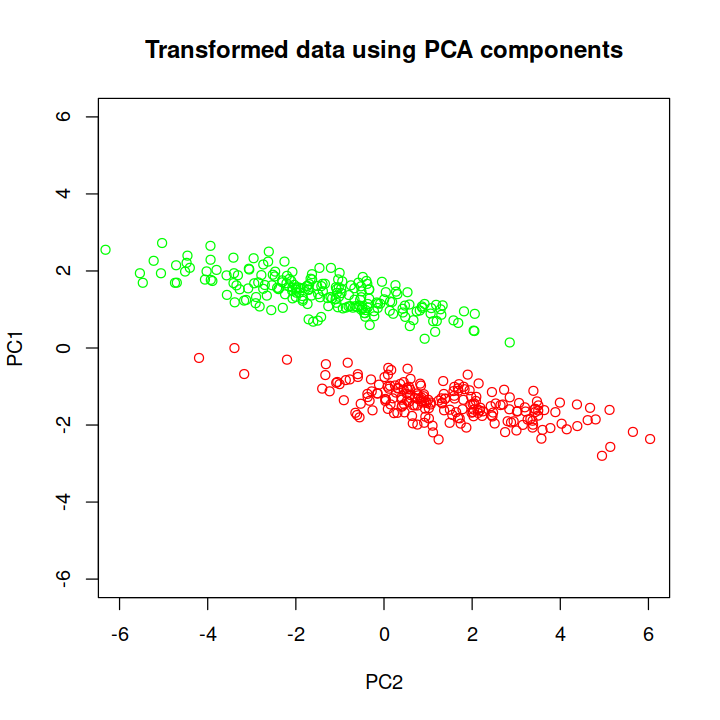

In [19]:
R.red = X.red %*% myPCA$rotation
R.green = X.green %*% myPCA$rotation

plot(c(R.red[,1],R.green[,1]), c(R.red[,2],R.green[,2]),
     col=c(rep('red',N),rep('green',N)),
     main="Transformed data using PCA components",
     xlab="PC2", ylab="PC1", xlim=c(-6,6),ylim=c(-6,6))


***

## Example 2: Visualizing crabs with FDA

 Campbell studied rock crabs of the genus "Leptograpsus" in 1974. One
 species, Leptograpsus variegatus, had been split into two new species,
previously grouped by colour (orange and blue). Preserved specimens
 lose their colour, so it was hoped that morphological differences
 would enable museum material to be classified.

 Data is available on 50 specimens of each sex of each species (so 200 in total),
 collected on sight at Fremantle, Western Australia. Each specimen has
 measurements on: the width of the frontal lobe (FL), the rear width (RW),
 the length along the carapace midline (CL), the maximum width (CW) of 
 the carapace, and the body depth (BD) in mm, in addition to
 colour (that is, species) and sex.

 the crabs data is also in the MASS package

In [20]:
data(crabs)

 look at data

In [21]:
?crabs
summary(crabs)
head(crabs)

 sp      sex         index            FL              RW              CL       
 B:100   F:100   Min.   : 1.0   Min.   : 7.20   Min.   : 6.50   Min.   :14.70  
 O:100   M:100   1st Qu.:13.0   1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27  
                 Median :25.5   Median :15.55   Median :12.80   Median :32.10  
                 Mean   :25.5   Mean   :15.58   Mean   :12.74   Mean   :32.11  
                 3rd Qu.:38.0   3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23  
                 Max.   :50.0   Max.   :23.10   Max.   :20.20   Max.   :47.60  
       CW              BD       
 Min.   :17.10   Min.   : 6.10  
 1st Qu.:31.50   1st Qu.:11.40  
 Median :36.80   Median :13.90  
 Mean   :36.41   Mean   :14.03  
 3rd Qu.:42.00   3rd Qu.:16.60  
 Max.   :54.60   Max.   :21.60  

sp,sex,index,FL,RW,CL,CW,BD
B,M,1,8.1,6.7,16.1,19.0,7.0
B,M,2,8.8,7.7,18.1,20.8,7.4
B,M,3,9.2,7.8,19.0,22.4,7.7
B,M,4,9.6,7.9,20.1,23.1,8.2
B,M,5,9.8,8.0,20.3,23.0,8.2
B,M,6,10.8,9.0,23.0,26.5,9.8


 The goal is to separate the 200 crabs into four classes, given by the 2x2 configurations for sex (Male/Female) and species (Blue/Orange)

In [22]:
Crabs.class <- factor(paste(crabs[,1],crabs[,2],sep=""))

 Now 'BF' stands now for 'Blue Female', and so on

In [23]:
table(Crabs.class)

Crabs.class
BF BM OF OM 
50 50 50 50 

 using the rest of the variables as predictors (except 'index', which is only an index)

In [24]:
Crabs <- crabs[,4:8]

summary(Crabs)

       FL              RW              CL              CW       
 Min.   : 7.20   Min.   : 6.50   Min.   :14.70   Min.   :17.10  
 1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27   1st Qu.:31.50  
 Median :15.55   Median :12.80   Median :32.10   Median :36.80  
 Mean   :15.58   Mean   :12.74   Mean   :32.11   Mean   :36.41  
 3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23   3rd Qu.:42.00  
 Max.   :23.10   Max.   :20.20   Max.   :47.60   Max.   :54.60  
       BD       
 Min.   : 6.10  
 1st Qu.:11.40  
 Median :13.90  
 Mean   :14.03  
 3rd Qu.:16.60  
 Max.   :21.60  

 Various preliminary plots (notice all 5 predictors are continuous)

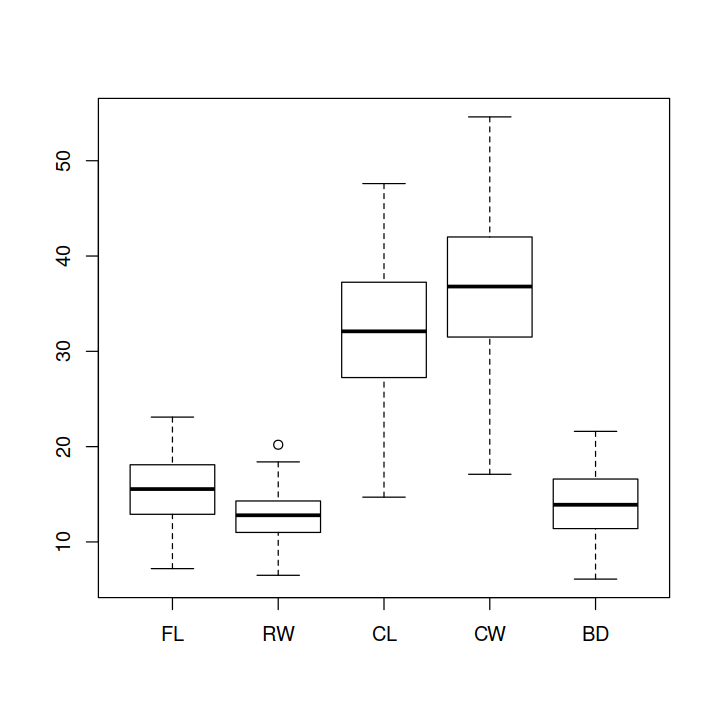

In [25]:
par(mfrow=c(1,1))
boxplot(Crabs)

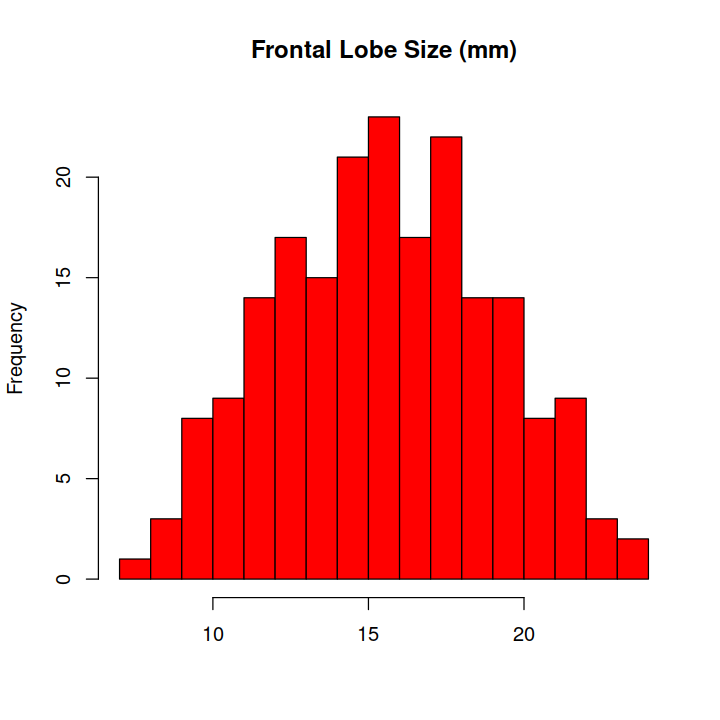

In [26]:
hist(Crabs$FL,col='red',breaks=20,xlab="", main='Frontal Lobe Size (mm)')

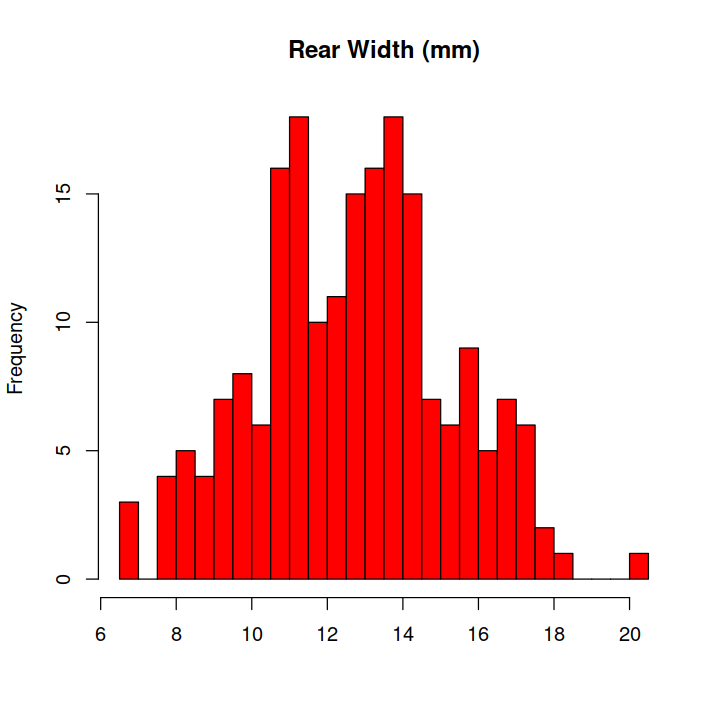

In [27]:
hist(Crabs$RW,col='red',breaks=20,xlab="", main='Rear Width (mm)')

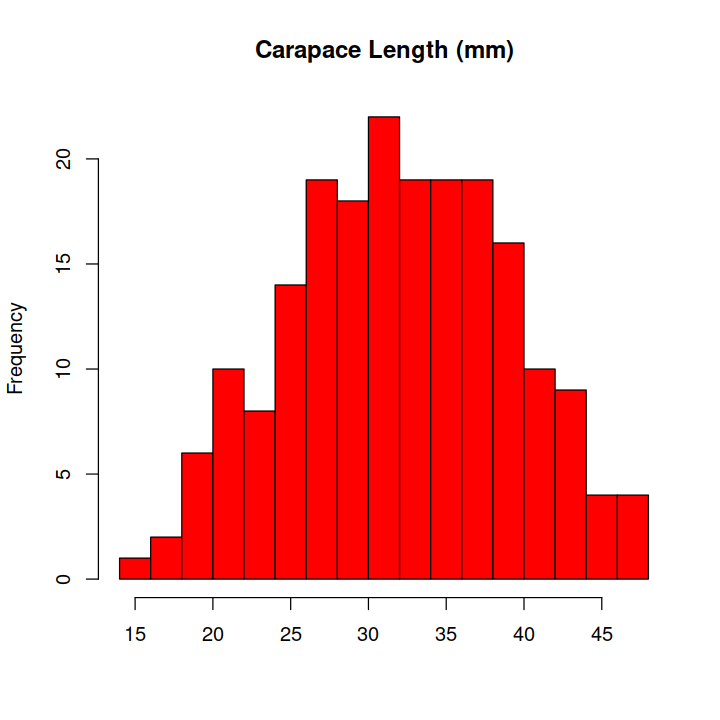

In [28]:
hist(Crabs$CL,col='red',breaks=20,xlab="", main='Carapace Length (mm)')

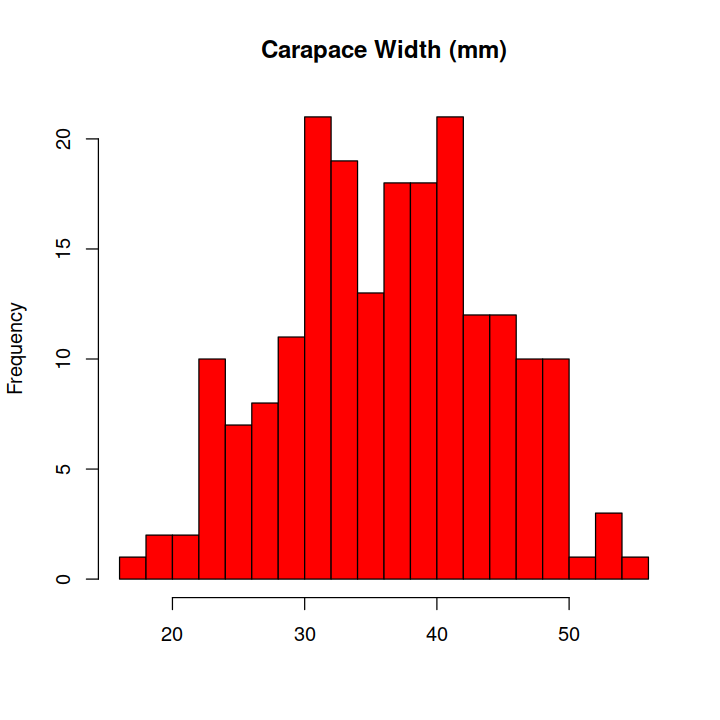

In [29]:
hist(Crabs$CW,col='red',breaks=20,xlab="", main='Carapace Width (mm)')

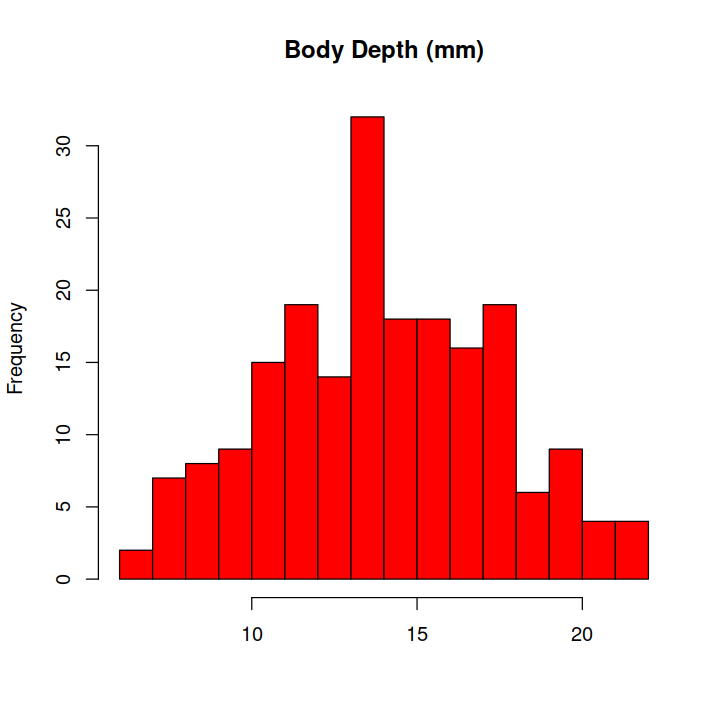

In [30]:
hist(Crabs$BD,col='red',breaks=20,xlab="", main='Body Depth (mm)')

 Now let's visualize data using FDA

In [31]:
(lda.model <- lda (x=Crabs, grouping=Crabs.class))

Call:
lda(Crabs, grouping = Crabs.class)

Prior probabilities of groups:
  BF   BM   OF   OM 
0.25 0.25 0.25 0.25 

Group means:
       FL     RW     CL     CW     BD
BF 13.270 12.138 28.102 32.624 11.816
BM 14.842 11.718 32.014 36.810 13.350
OF 17.594 14.836 34.618 39.036 15.632
OM 16.626 12.262 33.688 37.188 15.324

Coefficients of linear discriminants:
          LD1        LD2        LD3
FL -1.5543139 -0.1951885  1.6667377
RW -0.6247546 -1.5394972 -0.4558782
CL -0.1875489  1.0953923 -0.6807588
CW  1.5156077 -0.6435178  0.6548549
BD -1.3551090  0.5153193 -1.2859743

Proportion of trace:
   LD1    LD2    LD3 
0.6861 0.2995 0.0144 

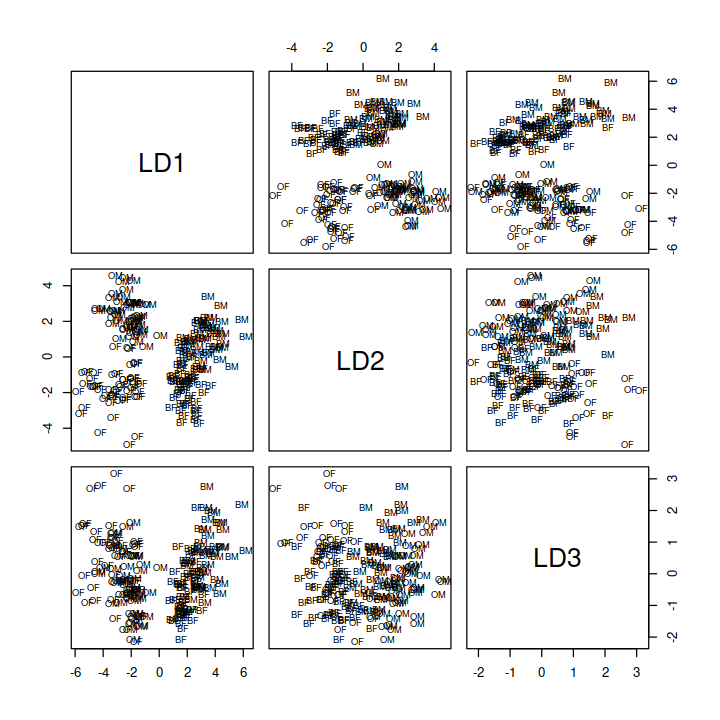

In [32]:
plot(lda.model)

 As there are four classes (called 'groups' in LDA), we get three linear discriminants (LDs) for projection (always the number of classes minus 1)
 We first compute the loadings (the 'loadings' are simply the projected data)

 This time we do it more generally, using matrix multiplication

In [33]:
loadings <- as.matrix(Crabs) %*% as.matrix(lda.model$scaling)

 We are performing dimensionality reduction 5D --> 3D, and plotting the projected data into the first two LDs (the 2 most important dimensions)

 We do our own plotting method, with color and legend:

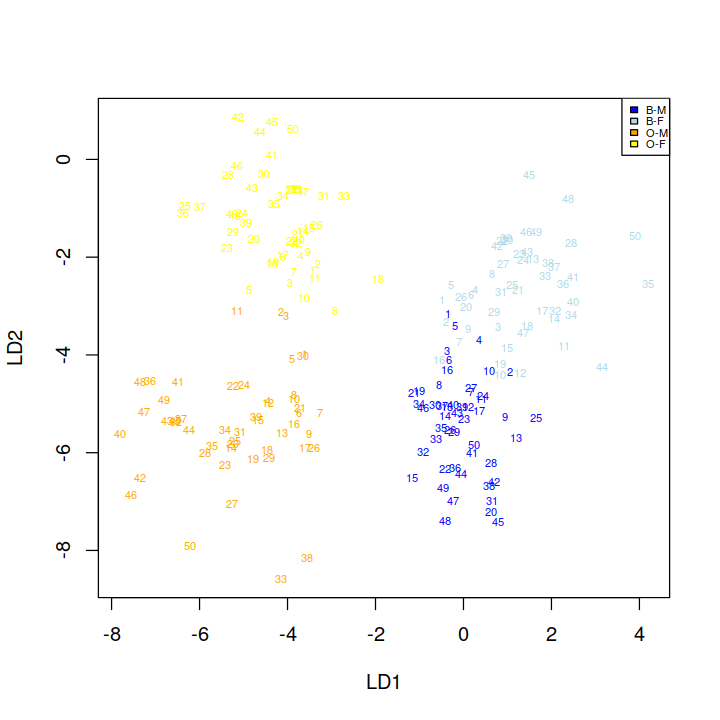

In [34]:
colors.crabs <- c('blue', 'lightblue', 'orange', 'yellow')

crabs.plot <- function (myloadings)
{
  plot (myloadings[,1], myloadings[,2], type="n", xlab="LD1", ylab="LD2")
  text (myloadings[,1], myloadings[,2], labels=crabs$index, col=colors.crabs[unclass(Crabs.class)], cex=.55)
  legend('topright', c("B-M","B-F","O-M","O-F"), fill=colors.crabs, cex=.55)
}

crabs.plot (loadings)

 The result is quite satisfactory, right? We can see that the 5 continuous predictors do indeed represent 4 different crabs. 

 We can also see that crabs of the Blue "variety" are less different 
 (regarding males and females) than those in the Orange variety

 If you would like to keep this new representation for later use (maybe to build a classifier on it), simply do:

In [35]:
Crabs.new <- data.frame (New.feature = loadings, Target = Crabs.class)

summary(Crabs.new)

 New.feature.LD1   New.feature.LD2   New.feature.LD3 Target 
 Min.   :-7.8187   Min.   :-8.5862   Min.   :1.958   BF:50  
 1st Qu.:-4.3791   1st Qu.:-5.3110   1st Qu.:3.317   BM:50  
 Median :-1.5494   Median :-3.8447   Median :3.973   OF:50  
 Mean   :-2.0234   Mean   :-3.6876   Mean   :4.113   OM:50  
 3rd Qu.: 0.5823   3rd Qu.:-1.9970   3rd Qu.:4.880          
 Max.   : 4.2048   Max.   : 0.8698   Max.   :7.280          

 Now let's analyze the numerical output of lda() in more detail:

In [36]:
lda.model

Call:
lda(Crabs, grouping = Crabs.class)

Prior probabilities of groups:
  BF   BM   OF   OM 
0.25 0.25 0.25 0.25 

Group means:
       FL     RW     CL     CW     BD
BF 13.270 12.138 28.102 32.624 11.816
BM 14.842 11.718 32.014 36.810 13.350
OF 17.594 14.836 34.618 39.036 15.632
OM 16.626 12.262 33.688 37.188 15.324

Coefficients of linear discriminants:
          LD1        LD2        LD3
FL -1.5543139 -0.1951885  1.6667377
RW -0.6247546 -1.5394972 -0.4558782
CL -0.1875489  1.0953923 -0.6807588
CW  1.5156077 -0.6435178  0.6548549
BD -1.3551090  0.5153193 -1.2859743

Proportion of trace:
   LD1    LD2    LD3 
0.6861 0.2995 0.0144 

 "Prior probabilities of groups" is self-explanatory (these are estimated from the data, but can be overriden by the 'prior' parameter)

 "Group means" is also self-explanatory (these are our mu's)

 "Coefficients of linear discriminants" are the scaling factors we have been using to project data. These have been normalized so that the within-groups covariance matrix is spherical (a multiple of the identity). 

 This means that the larger the coefficient of a predictor,
 the more important the predictor is for the discrimination:

In [37]:
lda.model$scaling

,LD1,LD2,LD3
FL,-1.5543139,-0.1951885,1.6667377
RW,-0.6247546,-1.5394972,-0.4558782
CL,-0.1875489,1.0953923,-0.6807588
CW,1.5156077,-0.6435178,0.6548549
BD,-1.3551090,0.5153193,-1.2859743


 We can interpret our plot so that the horizontal axis (LD1) separates the groups mainly by using FL, CW and BD;
 the vertical axis (LD2) separates the groups mainly by using RW and some CL, etc

 The "Proportion of trace" is the proportion of between-class variance that is explained by successive discriminants (LDs)

 For instance, in our case LD1 explains 68.6% of the total between-class variance

 In this case, the first two LDs account for 98.56% of total between-class variance, fairly close to 100%

 This means that the third dimension adds but a little bit of discriminatory information. Let's visualize the crabs in 3D:

In [38]:
library(rgl)

3D scatterplot (can be rotated and zoomed in/out with the mouse)

In [39]:
plot3d(loadings[,1], loadings[,2], loadings[,3], "LD1", "LD2", "LD3",
       size = 4, col=colors.crabs[unclass(Crabs.class)], main="Crabs Data")

text3d(loadings[,1], loadings[,2], loadings[,3], 
       color = "black", texts=rownames(Crabs.new), adj = c(0.85, 0.85), cex=0.6)

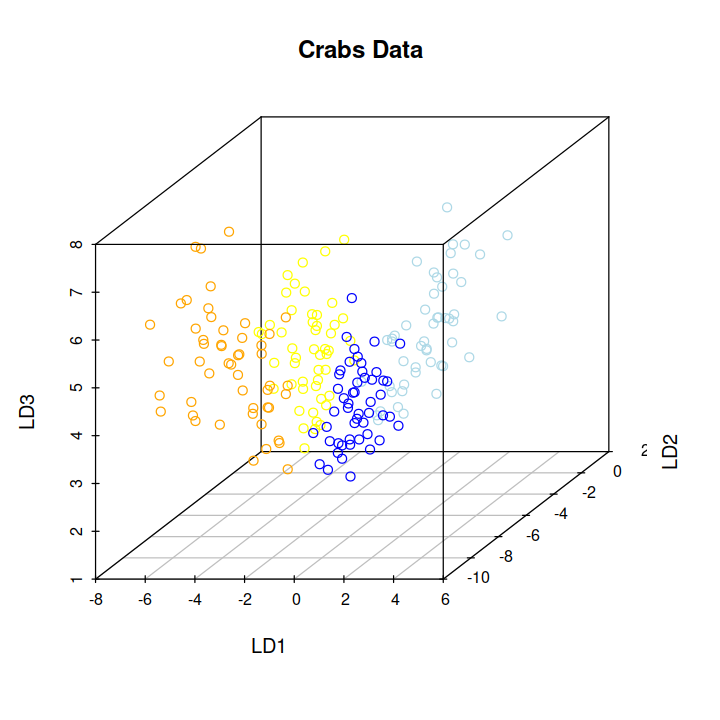

In [40]:
library(scatterplot3d) 
scatterplot3d(loadings[,1], loadings[,2], loadings[,3], 
              xlab="LD1", ylab="LD2", zlab="LD3", 
              color=colors.crabs[unclass(Crabs.class)], main="Crabs Data")

 As the measurements are lengths, it could be sensible to take logarithms

In [41]:
(lda.logmodel <- lda (x=log(Crabs), grouping=Crabs.class))

Call:
lda(log(Crabs), grouping = Crabs.class)

Prior probabilities of groups:
  BF   BM   OF   OM 
0.25 0.25 0.25 0.25 

Group means:
         FL       RW       CL       CW       BD
BF 2.564985 2.475174 3.312685 3.462327 2.441351
BM 2.672724 2.443774 3.437968 3.578077 2.560806
OF 2.852455 2.683831 3.529370 3.649555 2.733273
OM 2.787885 2.489921 3.490431 3.589426 2.701580

Coefficients of linear discriminants:
          LD1        LD2        LD3
FL -31.217207  -2.851488  25.719750
RW  -9.485303 -24.652581  -6.067361
CL  -9.822169  38.578804 -31.679288
CW  65.950295 -21.375951  30.600428
BD -17.998493   6.002432 -14.541487

Proportion of trace:
   LD1    LD2    LD3 
0.6891 0.3018 0.0091 

The model looks a bit better, given that he first two LDs now account for 99.09% of total between-class variance, very good indeed, so a 3D plot does not add anything visual

 As an example, the first (log) LD is given by:

    `LD1 = -31.2*log(FL) - 9.5*log(RW) - 9.8*log(CL) + 66*log(CW) - 18*log(BD)`

get the new loadings

In [42]:
logloadings <- as.matrix(log(Crabs)) %*% as.matrix(lda.logmodel$scaling)

plot the projected data in the first two LDs

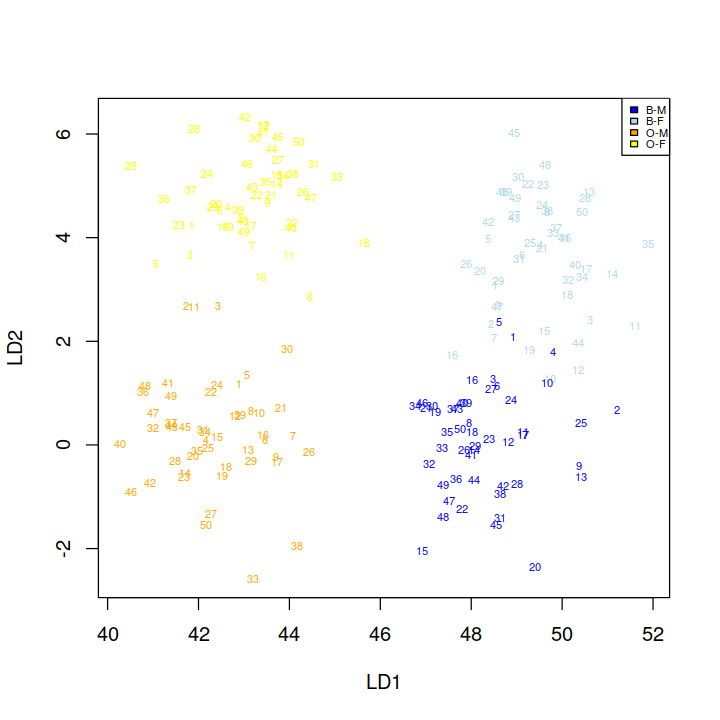

In [43]:
crabs.plot (logloadings)

The first coordinate clearly expresses the difference between species, and the second the difference between sexes!